<a href="https://colab.research.google.com/github/uday96/EVA4-TSAI/blob/master/S14-15/EVA4_S15A_gen_fg_bg_depth_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount and Fetch Data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
%reload_ext autoreload
%autoreload 2

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import zipfile

path_to_zip_file = "/content/gdrive/My Drive/EVA4-Workspace/persons_fg/fg_bg.zip"
directory_to_extract_to = '/content/'
print("Extracting zip file: %s" % path_to_zip_file)
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  for f in zip_ref.namelist():
    if f.startswith('fg_bg/'):
      zip_ref.extract(f, directory_to_extract_to)
print("Extracted at: %s" % directory_to_extract_to)

Extracting zip file: /content/gdrive/My Drive/EVA4-Workspace/persons_fg/fg_bg.zip
Extracted at: /content/


## Imports and Initialization

Import required modules

In [0]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-f03ad22a-d269-ec1b-b2bc-61b40105d45b)


In [0]:
!git clone -b cars_fg https://github.com/uday96/DenseDepth.git

Cloning into 'DenseDepth'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 245 (delta 0), reused 1 (delta 0), pack-reused 241
Receiving objects: 100% (245/245), 11.80 MiB | 28.50 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [0]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DenseDepth/nyu.h5

--2020-05-08 17:23:03--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.56.211
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.56.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./DenseDepth/nyu.h5’

./DenseDepth/nyu.h5 100%[===================>] 164.89M  28.1MB/s    in 6.6s    

2020-05-08 17:23:10 (25.1 MB/s) - ‘./DenseDepth/nyu.h5’ saved [172897376/172897376]



In [0]:
import os
os.chdir("/content/DenseDepth")

from mtest import get_model, infer

Using TensorFlow backend.


## Generate FG_BG depth maps

Use a pre-trained model to generate the depth maps.

The code is run multiple times by chunking the backgrounds and generating depth maps for each background in a chunk.

In [0]:
model = get_model()

Loading model...

Model loaded (nyu.h5).


In [0]:
from zipfile import ZipFile, ZIP_STORED
import os
import datetime

bg_start = 75
bg_end = 100
zip_file_name = f"fg_bg_depth_s{bg_start:02d}_e{bg_end:02d}.zip"

for bg_id in range(bg_start, bg_end):
  st = datetime.datetime.now()
  zipf = ZipFile(zip_file_name, mode='a', compression=ZIP_STORED)
  infer(model, bg_id, zipf=zipf, show_viz=(bg_id==(bg_end-1)),
        batch_size=512, scale=2, base_path="/content/fg_bg")
  zipf.close()
  et = datetime.datetime.now()
  delta = et-st
  print(f"BG[{bg_id:02d}] processing time: {delta}")


Loading images from /content/fg_bg/bg_75/*.jpg
Batch[1]: Loaded (512) images of size (448, 448, 3).
Batch[2]: Loaded (512) images of size (448, 448, 3).
Batch[3]: Loaded (512) images of size (448, 448, 3).
Batch[4]: Loaded (512) images of size (448, 448, 3).
Batch[5]: Loaded (512) images of size (448, 448, 3).
Batch[6]: Loaded (512) images of size (448, 448, 3).
Batch[7]: Loaded (512) images of size (448, 448, 3).
Batch[8]: Loaded (416) images of size (448, 448, 3).
BG[75] processing time: 0:05:55.660711

Loading images from /content/fg_bg/bg_76/*.jpg
Batch[1]: Loaded (512) images of size (448, 448, 3).
Batch[2]: Loaded (512) images of size (448, 448, 3).
Batch[3]: Loaded (512) images of size (448, 448, 3).
Batch[4]: Loaded (512) images of size (448, 448, 3).
Batch[5]: Loaded (512) images of size (448, 448, 3).
Batch[6]: Loaded (512) images of size (448, 448, 3).
Batch[7]: Loaded (512) images of size (448, 448, 3).
Batch[8]: Loaded (416) images of size (448, 448, 3).
BG[76] processing

Save the generated images to Google Drive

In [0]:
os.system(f'cp "{zip_file_name}" "/content/gdrive/My Drive/EVA4-Workspace/persons_fg/"')

0

## Depth Map Visualization

Visualise generated depth maps

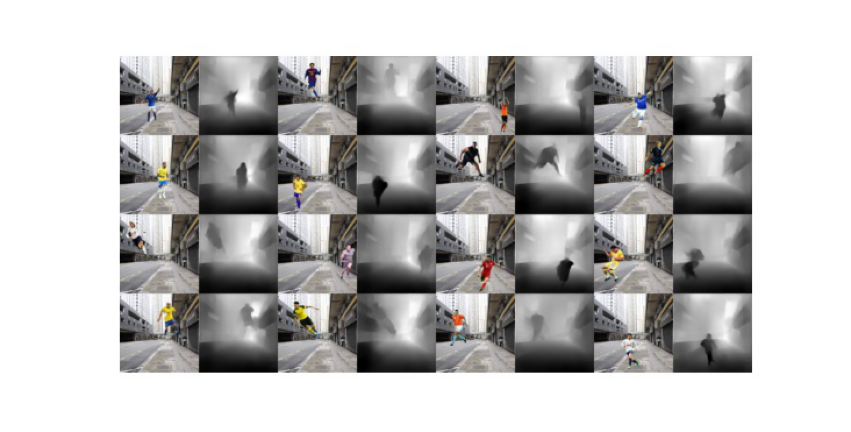

In [0]:
from matplotlib import pyplot as plt
from skimage import io

plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow( io.imread('/content/DenseDepth/visualise_depth_maps.jpg') )